In [1]:
%load_ext autoreload
%autoreload 2

In [54]:
import npc_sessions
import matplotlib.pyplot as plt
import numpy as np

session = npc_sessions.Session('716718_2024-08-02')
session = npc_sessions.Session('736208_2024-09-05')


In [32]:
import PIL.Image
image = PIL.Image.open(io.BytesIO(path.read_bytes()))
image.info

{'dpi': (96.012, 96.012)}

In [44]:
# download png to temp path then check created data on file
import tempfile
import pathlib
import datetime

with tempfile.TemporaryDirectory() as tmpdirname:
    tmp_path = pathlib.Path(tmpdirname) / 'test.png'
    tmp_path.write_bytes(path.read_bytes())
    print(datetime.datetime.fromtimestamp(tmp_path.stat().st_ctime).strftime('%H:%M:%S'))

11:01:03


In [59]:
import time
import matplotlib.figure
import upath
import aind_session
import npc_session
import codeocean
import codeocean.computation
import io

def plot_drift_maps(session: npc_sessions.DynamicRoutingSession) -> tuple[matplotlib.figure.Figure, ...]:
    paths = [upath.UPath(f's3://aind-scratch-data/dynamic-routing/drift_maps/{session.session_id}_{probe}.png') for probe in session.probe_letters_to_use]
    if not any(path.exists() for path in paths):
        print(f'Drift maps not found for {session.id}: running drift map generation in codeocean (takes ~1 minute)')
        computation = run_drift_map_capsule(session.id)
        t0 = time.time()
        
        while aind_session.get_codeocean_model(computation.id, is_computation=True).state not in [codeocean.computation.ComputationState.Completed, codeocean.computation.ComputationState.Failed]:
            if (time.time() - t0 > 20 * 60):
                raise TimeoutError(f'Drift map computation took >5 mins to complete: {computation.id}')
            time.sleep(10)
            
    return tuple([plt.imread(io.BytesIO(path.read_bytes())) for path in sorted(paths) if path.exists()])
    
def run_drift_map_capsule(session_id: str) -> codeocean.computation.Computation:
    record = npc_session.SessionRecord(session_id)
    session: aind_session.Session = aind_session.get_sessions(subject_id=record.subject, date=record.date)[0]
    raw_asset = session.raw_data_asset
    sorted_asset = session.ecephys.latest_ks25_sorted_data_asset
    return aind_session.get_codeocean_client().computations.run_capsule(
        codeocean.computation.RunParams(
            capsule_id='556afd63-a439-4fd5-8e37-705ff059ea93',
            data_assets=[
                codeocean.computation.DataAssetsRunParam(id=asset.id, mount=asset.name) for asset in [raw_asset, sorted_asset]
            ],
        )
    )
plot_drift_maps(session)

Drift maps not found for 736208_2024-09-05: running drift map generation in codeocean (takes ~1 minute)


()

(-0.5, 4023.5, 3035.5, -0.5)

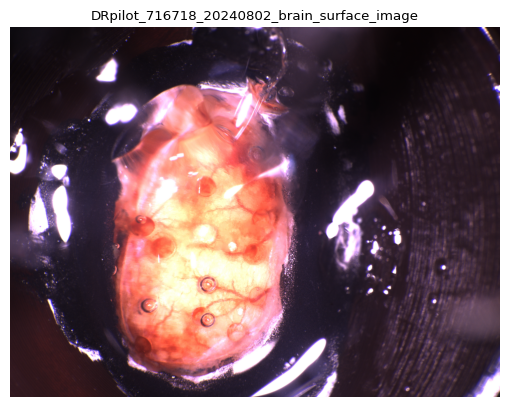

In [34]:
import matplotlib.pyplot as plt
import matplotlib.figure
import io

import tempfile
import pathlib
import datetime

import upath

def get_file_created_time(path: upath.UPath) -> str:
    with tempfile.TemporaryDirectory() as tmpdirname:
        tmp_path = pathlib.Path(tmpdirname) / 'test.png'
        tmp_path.write_bytes(path.read_bytes())
        return datetime.datetime.fromtimestamp(tmp_path.stat().st_ctime).strftime('%H:%M:%S')

def get_surface_images(
    session: npc_sessions.DynamicRoutingSession,
) -> tuple[matplotlib.figure.Figure, ...]:
    figs = []
    for p in session.raw_data_paths if 'surface_image' in p.stem:
        try:
            ctime = get_file_created_time(p)
        except:
            ctime = None
        plt.imshow(plt.imread(io.BytesIO(p.read_bytes())))
        plt.title(f"{p.stem}\n{ctime or 'time unknown'}")
        plt.gca().axis('off')
        figs.append(plt.gcf())
    return tuple(figs)

In [50]:
plt.figure(number=2).number

AttributeError: Figure.set() got an unexpected keyword argument 'number'

Sync deviation: 0.0003000000001520675

Neuropix-PXI-100.ProbeA-AP: 0.0003333324349981126

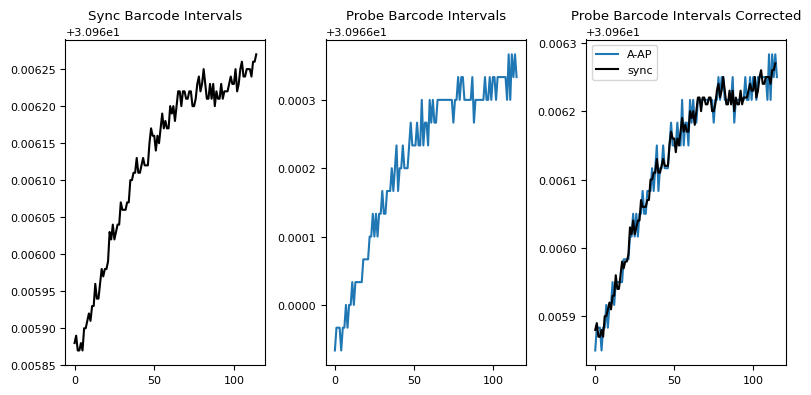

In [18]:
import npc_sessions_cache.plots.sync


npc_sessions_cache.plots.sync.plot_barcode_intervals(session);

In [60]:
import npc_sessions_cache.plots.audio


npc_sessions_cache.plots.audio.plot_audio_waveforms(session, target_stim=False);

stim_running block [40.78:40.80] has 1 vsync(s) - excluding from analysis


FileNotFoundError: No */continuous/NI-DAQmx-*/ dir found in recording_dir = (S3Path('s3://aind-private-data-prod-o5171v/ecephys_736208_2024-09-05_14-36-19/ecephys/ecephys_clipped/Record Node 101/experiment1/recording1'), S3Path('s3://aind-private-data-prod-o5171v/ecephys_736208_2024-09-05_14-36-19/ecephys/ecephys_clipped/Record Node 103/experiment1/recording1'))

In [29]:
import npc_sessions_cache
import npc_sessions_cache.plots
import npc_sessions_cache.plots.ephys


figs = npc_sessions_cache.plots.ephys.plot_sensory_responses(session)

TypeError: lit() got an unexpected keyword argument 'is_scalar'

In [28]:
session.units[:]['firing_range'].describe()

count    685.000000
mean       3.799445
std        7.839992
min        0.000000
25%        0.400000
50%        1.400000
75%        3.800000
max       76.080000
Name: firing_range, dtype: float64

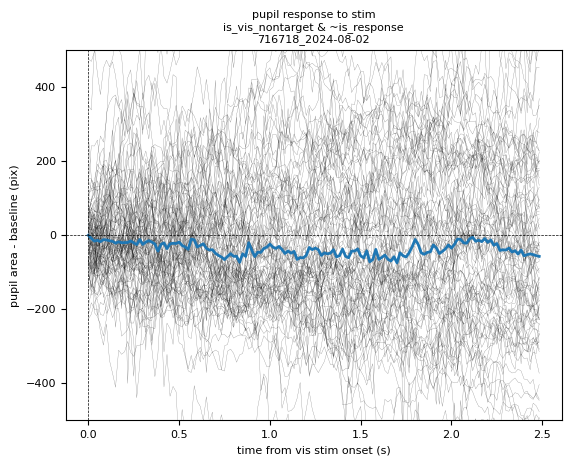

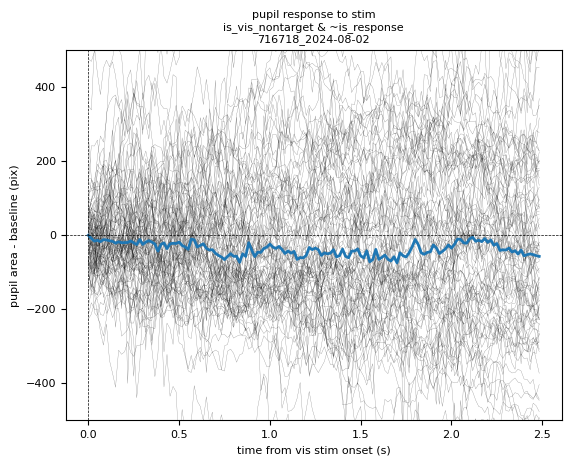

In [3]:
import npc_sessions_cache
import npc_sessions_cache.plots.video
import npc_sessions_cache.qc_evaluations
import npc_sessions_cache.plots


npc_sessions_cache.plots.video.plot_pupil_response(session)

In [12]:
session.epochs

,start_time,stop_time,stim_name,notes,interval_names,tags
id,,,,,,
0,42.43335,3687.756543,DynamicRouting1,,"[trials, performance]","[task, rewards]"


In [14]:
import npc_lims
import npc_stim

sessions = npc_lims.get_session_info(is_ephys=True)
session = sessions[100]
try:
    stim = next(session.cloud_path.glob('*/DynamicRouting1*.hdf5'))
    sync = next(session.cloud_path.glob('*/*.h5'))
except StopIteration:
    raise FileNotFoundError(f'sync or stim files not found for {session}')
    
raw = npc_stim.get_running_speed_from_stim_files(stim, sync=sync, filt=None)


In [18]:
!python -m pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

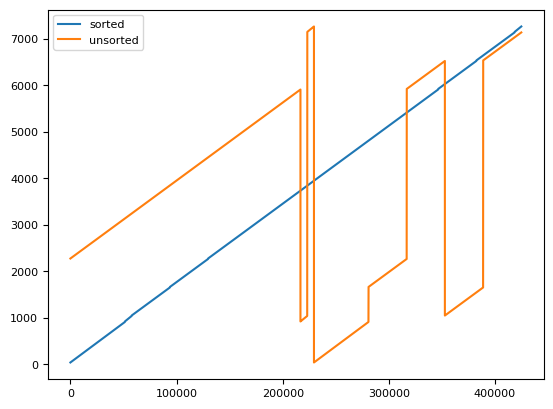

In [106]:
plt.plot(sorted(session._running_speed.timestamps))
plt.plot(session._running_speed.timestamps)
plt.gca().legend(['sorted', 'unsorted'])

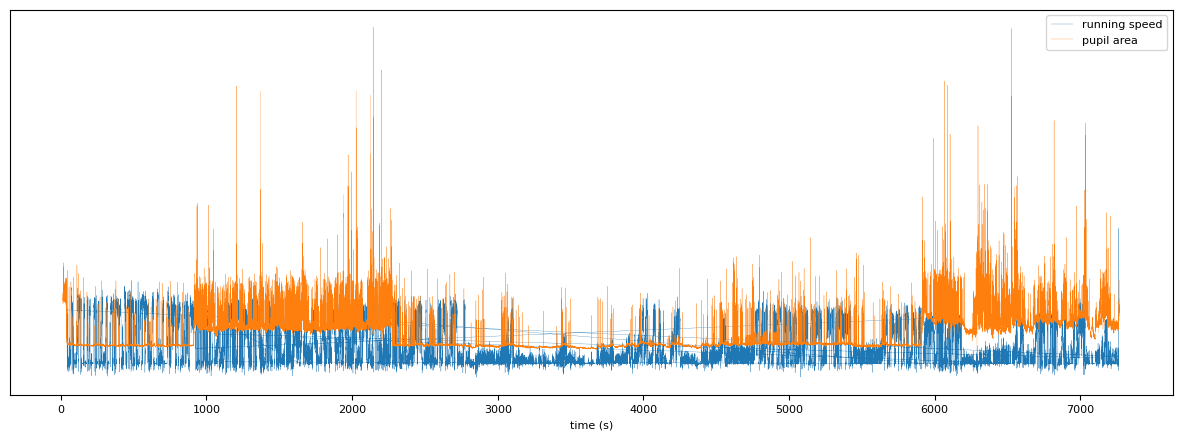

In [108]:
real_timestamps = np.array(session._eye_tracking.timestamps)[np.isnan(session._eye_tracking.pupil_area)]
valid_running_times = ~np.isnan(session._running_speed.timestamps) & ~np.isnan(session._running_speed.data)
# for xlim in range(0, round(real_timestamps[-1]), 1000):
plt.figure()
plt.plot(session._running_speed.timestamps[valid_running_times], session._running_speed.data[valid_running_times]/np.nanmedian(session._running_speed.data) -2, lw=.2)
plt.plot(session._eye_tracking.timestamps, session._eye_tracking.pupil_area/np.nanmedian(session._eye_tracking.pupil_area), lw=.2)
plt.gca().legend(['running speed', 'pupil area'])
plt.gca().set_xlabel('time (s)')
# plt.gca().set_aspect(100)
plt.gcf().set_size_inches(15, 5)
plt.gca().get_yaxis().set_visible(False)
# plt.gca().set_xlim(xlim, xlim + 1000)

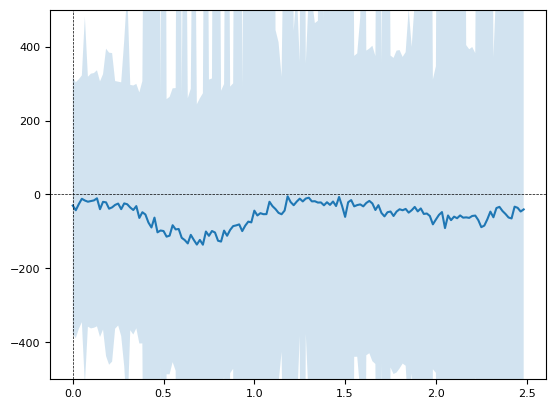

In [109]:
t = 2.5
MEAN = True

pupil_area = session._eye_tracking.pupil_area
real_timestamps = session._eye_tracking.timestamps

# t0 = session.trials[:].query('is_vis_nontarget & is_aud_context & ~is_response')['stim_start_time'].to_numpy()
t0 = session.intervals['vis_rf_mapping_trials'][:].query('is_vis_nontarget & ~is_response')['stim_start_time'].to_numpy()
t1 = t0 + t
trial_pupil_size = [
    pupil_area[slice(start, stop)] - np.nanmean(pupil_area[slice(baseline_0, start)])
    if 0 <= start < stop <= len(pupil_area) else []
    for baseline_0, start, stop in np.searchsorted(
        real_timestamps, np.array([t0 - 0.5, t0, t1]).T
    )
]

if MEAN:
    trial_pupil_size = np.array(trial_pupil_size)
    x = np.arange(0, t, t/trial_pupil_size.shape[1])
    y = np.nanmedian(trial_pupil_size, 0)
    plt.fill_between(
        x, y - np.nanstd(trial_pupil_size, 0), y + np.nanstd(trial_pupil_size, 0),
        alpha=.2
    )
    plt.plot(x, y)
    # plt.show()
else:
    for arr in trial_pupil_size:
        x = np.arange(0, t, t/len(arr))
        y = arr
        plt.plot(x, y, lw=.2, alpha=.5, c='k')
plt.gca().set_ylim(-500, 500)
plt.axhline(y=0, c='k', lw=.5, ls='--')
plt.axvline(x=0, c='k', lw=.5, ls='--');